In this this exercise, we will implement theK-means algorithm and use itfor image compression.  We will first start on an example 2D dataset that
will help us gain an intuition of how the K-means algorithm works.  Afterthat, we wil use theK-means algorithm for image compression by reducingthe  number  of  colors  that  occur  in  an  image  to  only  those  that  are  mostcommon in that image

The K-means algorithm is a method to automatically cluster similar data examples together.  Concretely,  we are given a training set{x(1),...,x(m)}(wherex(i)∈Rn), and want to group the data into a few cohesive “clusters”.The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigningexamples to their closest centroids and then recomputing the centroids based on the assignments.

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=loadmat('data/ex7data2.mat')

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

In [4]:
X=data['X']

In [5]:
X.shape

(300, 2)

# Visualize Data

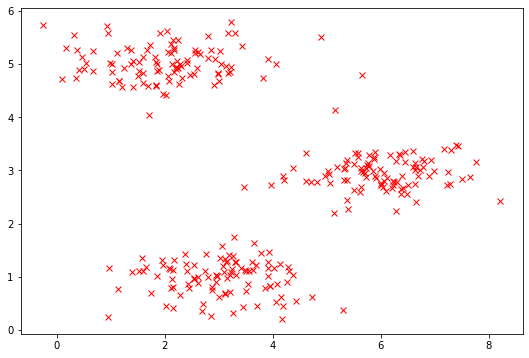

In [6]:
plt.figure(figsize=(9,6))
plt.plot(X[:,0],X[:,1],'rx');

In [7]:
def FindClosestCentroid(X,centroids):
    res=[]
    for i in range(len(X)):
        idx=0
        mini=np.sum(((X[i,:]-centroids[0,:])**2))
        for k in range(len(centroids)):
            dist=np.sum(((X[i,:]-centroids[k,:])**2))
            if mini>dist:
                mini=dist
                idx=k
        res.append(idx)
    
    return np.array(res)

        

In [8]:
def ComputeCentroids(X,idx):
    res=[]
    for i in set(idx):
        res.append(np.mean(X[idx==i],axis=0))
    return np.array(res)
    

For consistency, here we set centroids to specific values
but in practice you want to generate them automatically, such as by
settings them to be random examples

In [9]:
initial_centroids=np.array([[3,2],[6,2],[8,5]])

In [10]:
def runKMeans(X,initial_centroids,max_iters,plot_steps=True):
    centroids=initial_centroids
    for i in range(max_iters):
        
        idx=FindClosestCentroid(X,centroids)
        centroids=ComputeCentroids(X,idx)
        
        #plotting Clusters
        if plot_steps:
            for i in set(idx):
                plt.plot(X[idx==i,0],X[idx==i,1],'x')
            
            plt.show()
        
        
    return idx,centroids

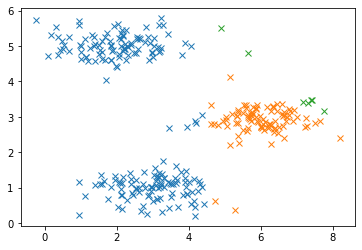

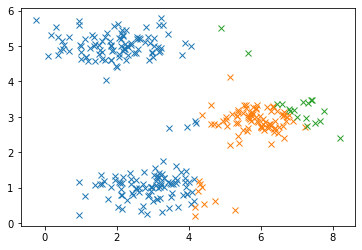

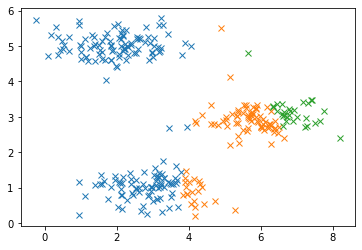

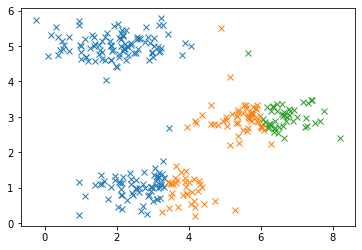

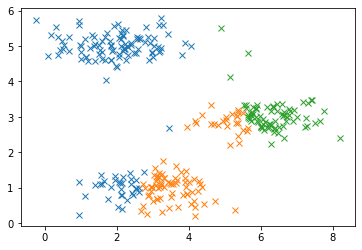

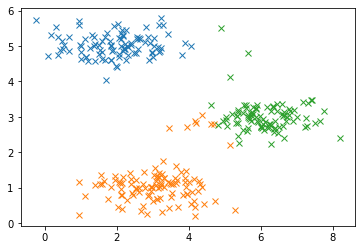

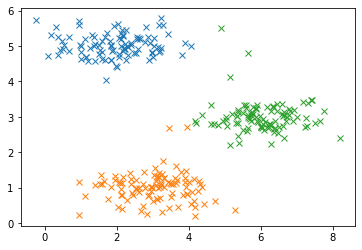

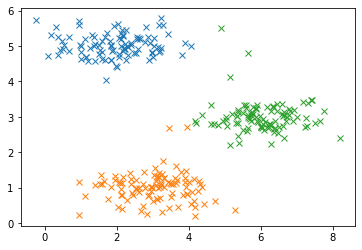

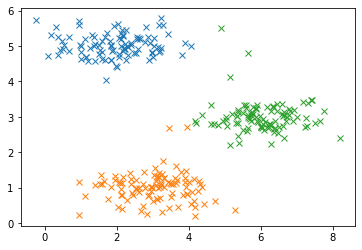

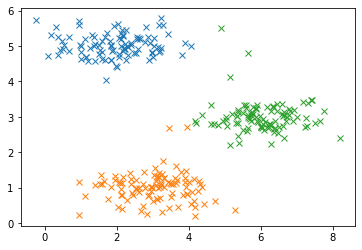

In [11]:
idx,cent=runKMeans(X,initial_centroids,10)

# The Data is grouped into 3 clusters

# Thank You